# Mood Classification using CNN (Happy or Sad)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Fri Aug 29 15:23:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [11]:
img = image.load_img("/content/drive/MyDrive/class projects/traning/happy/istockphoto-1043782554-1024x1024.jpg")

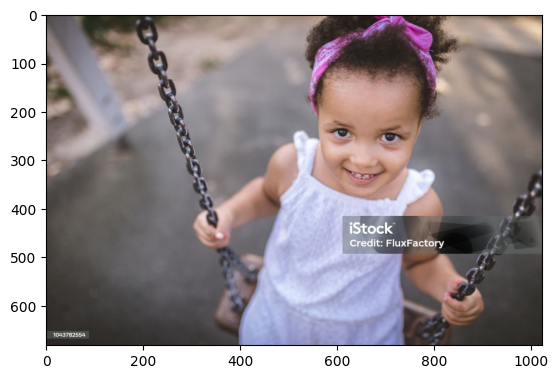

In [12]:
plt.imshow(img)

In [13]:
i1 = cv2.imread("/content/drive/MyDrive/class projects/traning/happy/istockphoto-1043782554-1024x1024.jpg")
i1

# 3d metrics are created for the image
# the value ranges from 0-255

array([[[ 71,  71,  77],
        [ 72,  72,  78],
        [ 73,  73,  79],
        ...,
        [ 59,  73,  91],
        [ 60,  75,  91],
        [ 60,  75,  91]],

       [[ 71,  71,  77],
        [ 72,  72,  78],
        [ 73,  73,  79],
        ...,
        [ 63,  77,  95],
        [ 63,  78,  94],
        [ 64,  79,  95]],

       [[ 72,  72,  78],
        [ 72,  72,  78],
        [ 73,  73,  79],
        ...,
        [ 69,  84, 100],
        [ 69,  84, 100],
        [ 69,  84, 100]],

       ...,

       [[ 36,  39,  43],
        [ 36,  39,  43],
        [ 36,  39,  43],
        ...,
        [ 36,  39,  43],
        [ 36,  39,  43],
        [ 36,  39,  43]],

       [[ 36,  39,  43],
        [ 36,  39,  43],
        [ 36,  39,  43],
        ...,
        [ 36,  39,  43],
        [ 36,  39,  43],
        [ 36,  39,  43]],

       [[ 36,  39,  43],
        [ 36,  39,  43],
        [ 36,  39,  43],
        ...,
        [ 36,  39,  43],
        [ 36,  39,  43],
        [ 36,  39,  43]]

In [15]:
i1.shape

# shape of your image height, weight, rgb

(682, 1024, 3)

In [16]:
train = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200)

# to scale the image i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [17]:
train_dataset = train.flow_from_directory(
    "/content/drive/MyDrive/class projects/traning",
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
)

validation_dataset = train.flow_from_directory(
    "/content/drive/MyDrive/class projects/validation",
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
)

Found 34 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [18]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [20]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), # 3 filter we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [24]:
model_fit = model.fit(train_dataset, epochs= 15)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6697 - loss: 0.4312 
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - accuracy: 0.7745 - loss: 0.4065
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9700 - loss: 0.2596 
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6697 - loss: 0.5081 
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7898 - loss: 0.3176 
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8799 - loss: 0.2260 
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step - accuracy: 0.9412 - loss: 0.3286
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step - accuracy: 0.8235 - loss: 0.3139
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.1844 
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - accuracy: 1.0000 - loss: 0.0785
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 1.0000 - loss: 0.0606
Epoch 12/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - accuracy: 1.0000 - los

In [26]:
dir_path = '/content/drive/MyDrive/class projects/testing'

for i in os.listdir(dir_path):
  print(i)

# dir_path = '/content/drive/MyDrive/class projects/validation/sad'

# for i in os.listdir(dir_path):
#  print(i)

istockphoto-1043782554-1024x1024.jpg
boys-1283786_1280.jpg
istockphoto-1248639576-1024x1024.jpg
istockphoto-155096180-1024x1024.jpg
child-3199624_1280.jpg
girl-7839121_1280.jpg
girl-5846483_1280.jpg
christmas-wallpaper-2971961_1280.jpg
cap-2923682_1280.jpg
girl-738303_1280.jpg
ai-generated-9691043_1280.png
ai-generated-8723499_1280.jpg
ai-generated-8757498_1280.png
desperate-5011953_1280.jpg
girl-1107788_1280.jpg


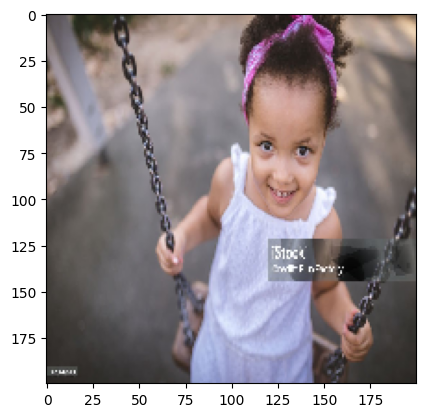

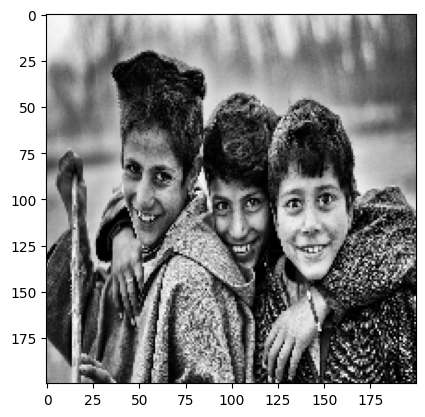

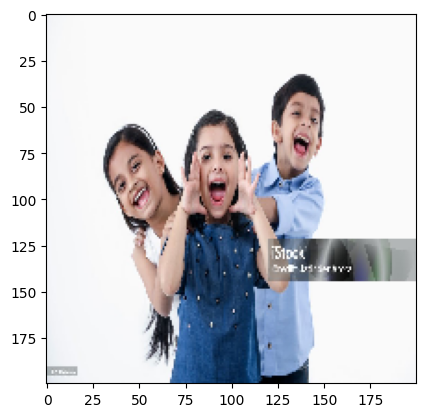

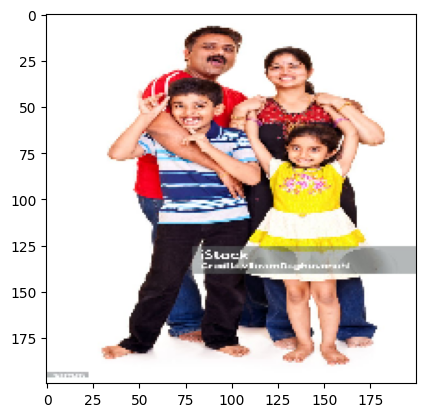

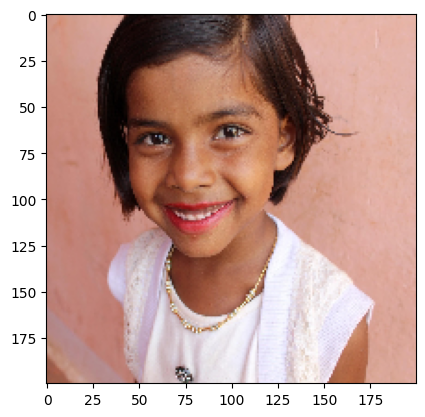

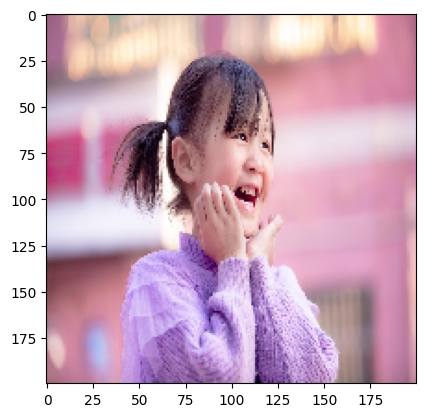

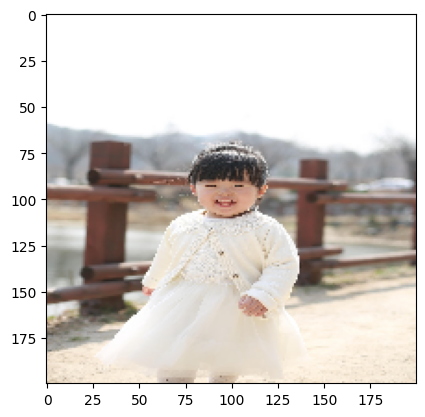

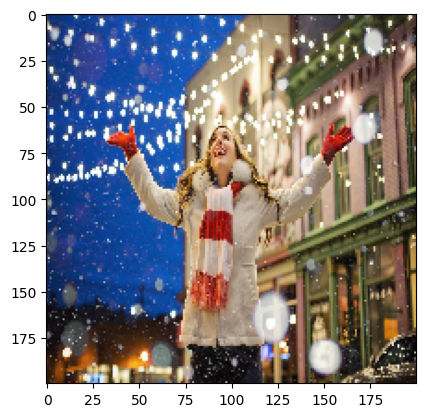

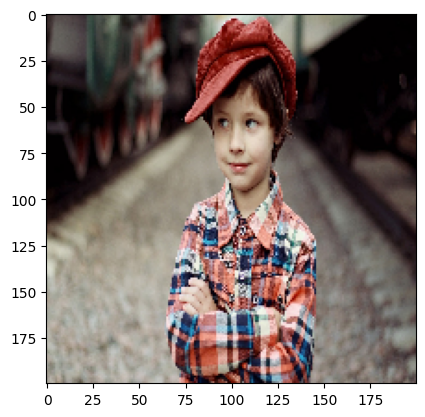

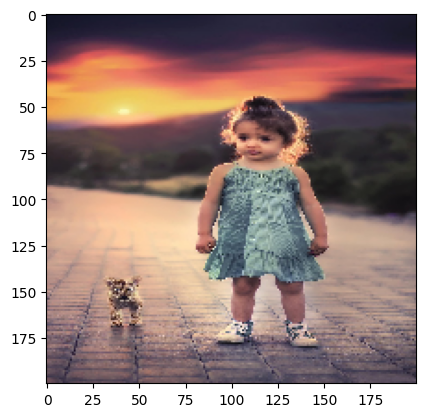

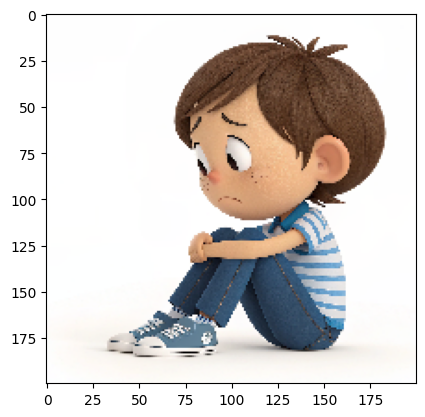

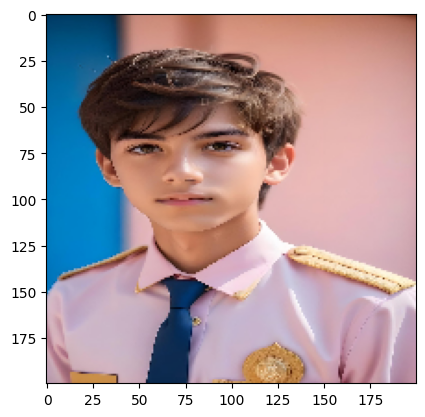

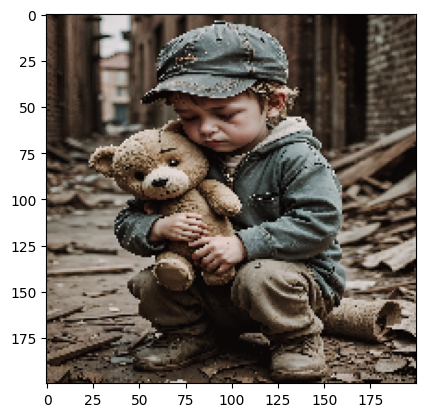

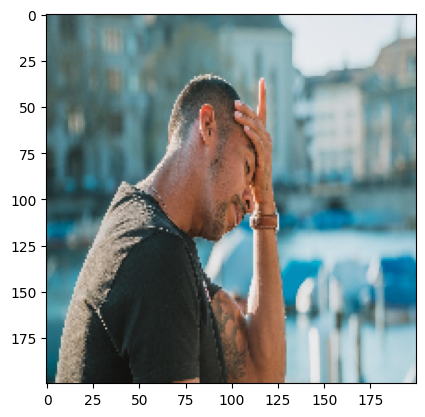

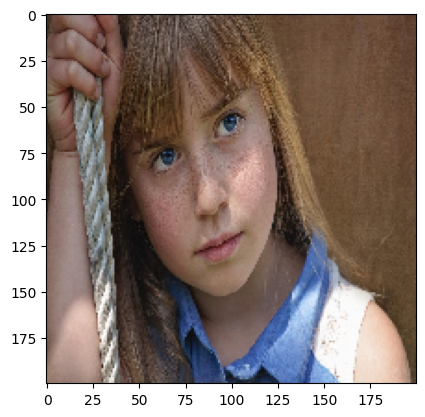

In [27]:
dir_path = '/content/drive/MyDrive/class projects/testing'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

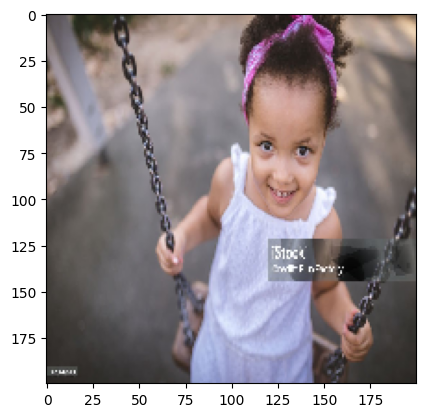

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
I am Happy


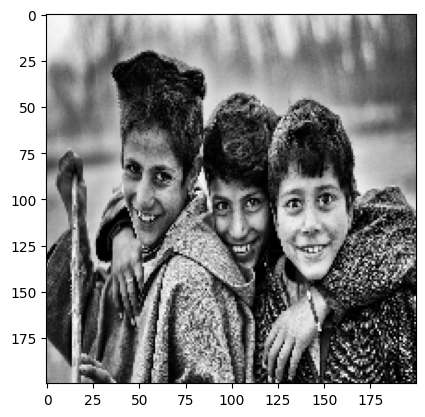

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
I am Happy


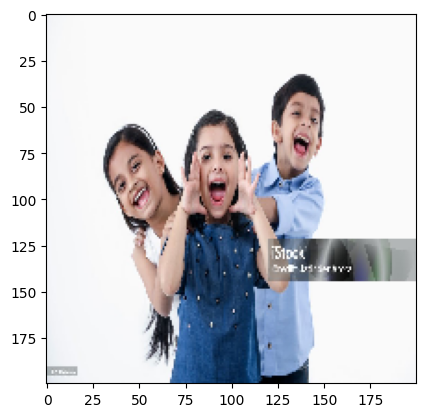

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
I am Happy


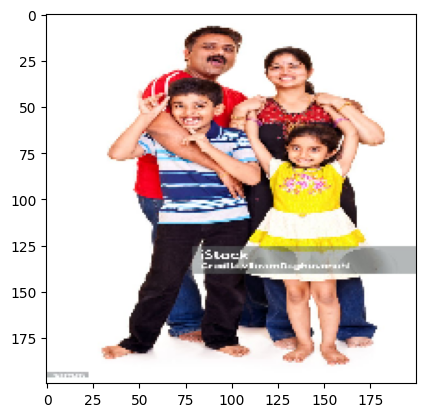

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
I am Happy


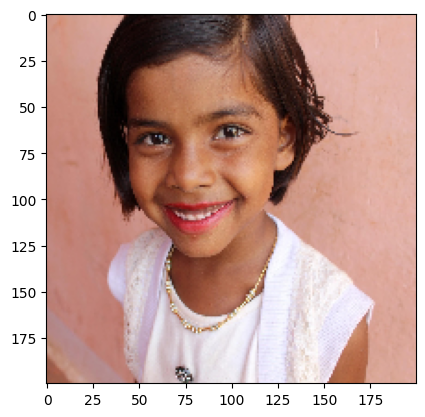

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
I am Happy


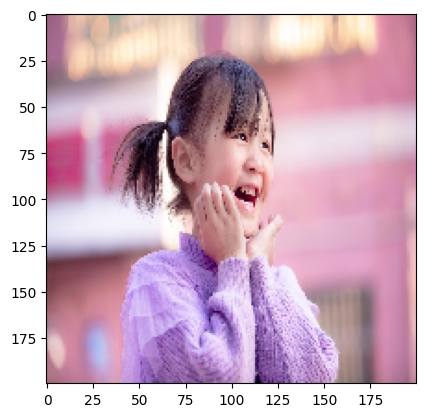

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
I am Happy


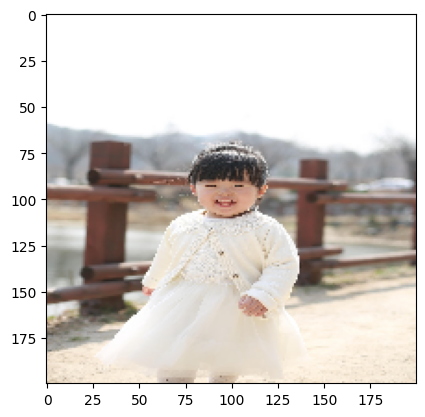

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
I am Happy


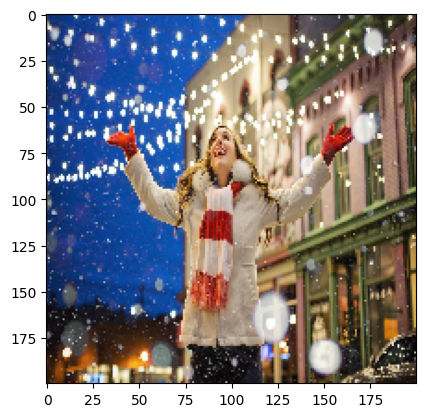

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
I am Happy


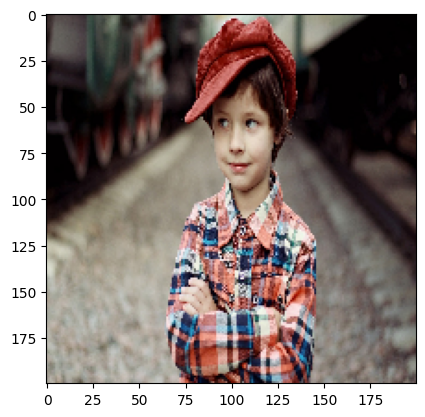

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
I am Happy


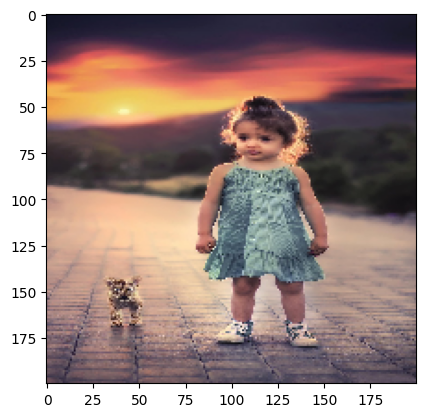

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
I am not Happy


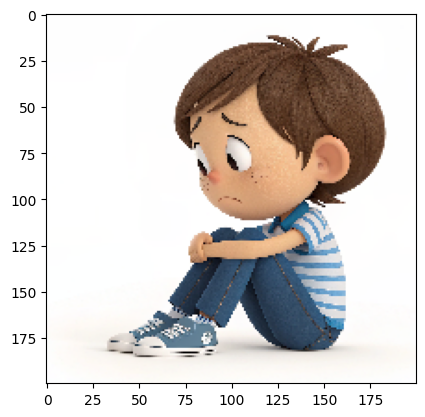

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
I am not Happy


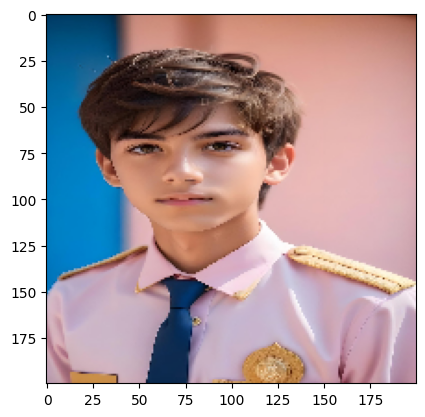

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
I am not Happy


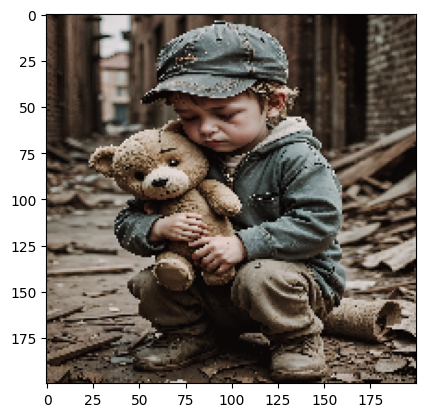

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
I am Happy


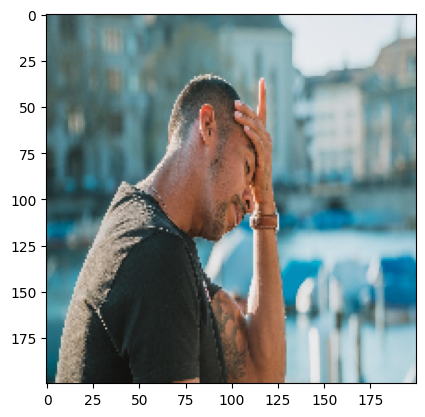

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
I am not Happy


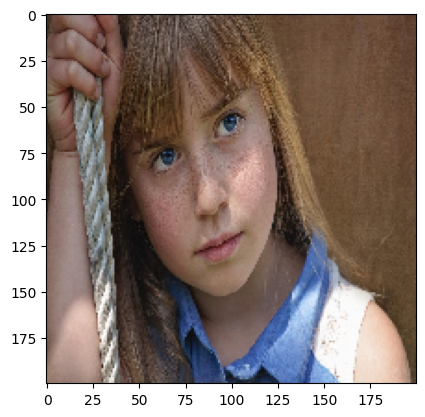

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
I am not Happy


In [28]:
dir_path = '/content/drive/MyDrive/class projects/testing'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("I am Happy")
  else:
    print("I am not Happy")

# Image classification using CNN Gradio app

In [35]:
!pip install gradio --quiet

In [36]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import gradio as gr


In [37]:
# Training Data
train = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(
    "/content/drive/MyDrive/class projects/traning",
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
)

# Validation Data (⚠️ if empty, comment it out)
validation = ImageDataGenerator(rescale=1/255)

validation_dataset = validation.flow_from_directory(
    "/content/drive/MyDrive/class projects/validation",
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
)


Found 34 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(200,200,3)),  # use Input() instead of input_shape warning
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [40]:
model.fit(train_dataset, epochs=5)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - accuracy: 0.5980 - loss: 5.8283
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7102 - loss: 0.6111 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step - accuracy: 0.1961 - loss: 1.0665
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step - accuracy: 0.3824 - loss: 0.7549
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7702 - loss: 0.6420 


In [41]:
model.save("/content/drive/MyDrive/class projects/mood_cnn.h5")


In [42]:
def predict_mood(img):
    img = img.resize((200,200))
    x = np.array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x, verbose=0)[0][0]
    mood = "😊 Happy" if prediction < 0.5 else "😢 Sad"
    confidence = (1 - prediction) if prediction < 0.5 else prediction
    return {
        mood: float(confidence),
        "😊 Happy" if mood == "😢 Sad" else "😢 Sad": float(1 - confidence)
    }


In [48]:
demo = gr.Interface(
    fn=predict_mood,
    inputs=gr.Image(type="pil", label="Upload an Image"),
    outputs=gr.Label(num_top_classes=2, label="Prediction"),
    title="Mood Classification with CNN 😊😢",
    description="Upload a face image, and the CNN will classify the mood as Happy or Sad."
)

demo.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6eed0bdb8640ecb70a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6eed0bdb8640ecb70a.gradio.live


In [47]:
# -*- coding: utf-8 -*-
# Mood Classification using CNN (Happy or Sad)
# Improved Version with Augmentation, EarlyStopping & Beautiful Gradio UI

# =====================
# 1. Setup
# =====================

!pip install gradio --quiet

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
import gradio as gr

# =====================
# 2. Data Preparation
# =====================
train_aug = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_aug = ImageDataGenerator(rescale=1/255)

train_dataset = train_aug.flow_from_directory(
    "/content/drive/MyDrive/class projects/traning",
    target_size=(200,200),
    batch_size=16,
    class_mode='binary'
)

# Validation fallback (auto skip if empty)
val_path = "/content/drive/MyDrive/class projects/validation"
if os.path.exists(val_path) and any(os.scandir(val_path)):
    validation_dataset = val_aug.flow_from_directory(
        val_path,
        target_size=(200,200),
        batch_size=16,
        class_mode='binary'
    )
else:
    validation_dataset = None
    print("⚠️ No validation data found. Training without validation.")

# =====================
# 3. Model Definition
# =====================
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(200,200,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

# =====================
# 4. Training with EarlyStopping
# =====================
callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    ModelCheckpoint("/content/drive/MyDrive/class projects/best_mood_model.h5",
                    save_best_only=True, monitor="val_accuracy", mode="max")
]

if validation_dataset:
    history = model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=15,
        callbacks=callbacks
    )
else:
    history = model.fit(
        train_dataset,
        epochs=15,
        callbacks=[EarlyStopping(monitor="loss", patience=3, restore_best_weights=True)]
    )

# =====================
# 5. Prediction Function
# =====================
def predict_mood(img):
    img = img.resize((200,200))
    x = np.array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x, verbose=0)[0][0]
    prob_happy = 1 - prediction
    prob_sad = prediction
    return {"😊 Happy": float(prob_happy), "😢 Sad": float(prob_sad)}

# =====================
# 6. Gradio Frontend
# =====================
demo = gr.Interface(
    fn=predict_mood,
    inputs=gr.Image(type="pil", label="Upload an Image"),
    outputs=gr.Label(num_top_classes=2, label="Mood Prediction"),
    title="Mood Classification CNN 🎭",
    description="Upload an image, and this CNN will classify mood as Happy 😊 or Sad 😢 with confidence scores.",
    examples=[
        ["/content/drive/MyDrive/class projects/testing/ai-generated-9691043_1280.png"],
        ["/content/drive/MyDrive/class projects/testing/istockphoto-1248639576-1024x1024.jpg"]
    ],
    live=False,
    theme="soft"  # nicer UI
)

demo.launch(debug=True, share=True)


Found 34 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6299 - loss: 0.6401
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.6179 - loss: 0.5921
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 0.5858 - loss: 0.6921
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.6057 - loss: 0.7011
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.5979 - loss: 0.6366
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4cecf752c374274ba9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4cecf752c374274ba9.gradio.live
